<img style="float: left; width: 260px;" src="images/shutterstock_318255209.jpg">
***
## <font color="grey"> $\quad$ Inferring differences between NRAS and BRAF melanoma</font>
***
$\newcommand{\vct}[1]{\mathbf{#1}}$
$\newcommand{\mtx}[1]{\mathbf{#1}}$
$\newcommand{\e}{\varepsilon}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\minimize}{\mathrm{minimize}\quad}$
$\newcommand{\maximize}{\mathrm{maximize}\quad}$
$\newcommand{\subjto}{\quad\text{subject to}\quad}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\trans}{T}$
$\newcommand{\ip}[2]{\langle {#1}, {#2} \rangle}$
$\newcommand{\zerovct}{\vct{0}}$
$\newcommand{\diff}[1]{\mathrm{d}{#1}}$
$\newcommand{\conv}{\operatorname{conv}}$
$\newcommand{\inter}{{\operatorname{int}}}$

---
## <font color="grey">  1. Summary</font>
---

In this first section I try to summarise the observations, the next section after that contains the code in more detail.

### <font color="grey">  1.1. Data</font>

We use data from the [The Cancer Genome Atlas (TCGA) skin cutaneous melanoma (SKCM)](https://gdc-portal.nci.nih.gov/projects/TCGA-SKCM) database. The prepared data is from the supplementary material to [Robles-Espinoza et al](http://www.nature.com/articles/ncomms12064), which includes, for each sample, additional information on the MC1R phenotype (whether an individual has two, one or no 'R' alleles). We enriched the data with the exposure (number of mutations attributed to) mutation signatures 1, 5, and 7. The mutational signatures are taken from the [COSMIC Database](http://cancer.sanger.ac.uk/cosmic). In addition, where possible, we added information on whether the sample had mutations in the BRAF or NRAS genes, which according to Amaya are mutually exclusive. Overall, the resulting dataset consists of $196$ samples.

### <font color="grey">  1.2. Results</font>

Based on the analysis of accummulation rates, we estimate the that cells with NRAS mutation divide at a rate of approximately between $1.2$ and $1.3$ faster than cells with BRAF mutations. This remains approximately true when restricting the data to samples to different MC1R status but not gender. Here, by *mutation* we mean one unit of Signature 1 and 5 exposure. Alternative we can also count subsitutions which are not TCC>TTC (which is the dominant form in Signature 7).

Denote by $d_{\mathrm{NRAS}}$ and $d_{\mathrm{BRAF}}$ the expected number of cell divisions per year among the cells with NRAS and with BRAF mutations, respectively. While we can estimate the ratio of these from the data, in order to get estimates of each one we need an estimate of the mutation rate per cell division. This can be calculated by looking at the whole dataset and using the estimate of $2.48$ division per year reported by Tomasetti and Vogelstein. Model 1 is a simple Poisson model in which the intensity $\lambda t$ changes linearly with time.

**Model 1** (*All ages*)

In [148]:
alldata <- read.csv("divrates_all.csv", header=TRUE, row.names=1)
round(alldata, 2)

,Ratio,Mutation.rate,Division.rate.NRAS,Division.rate.BRAF
All,1.22,0.60,2.77,2.27
1-2 R,1.28,0.74,2.88,2.26
0 R,1.32,0.48,2.84,2.16
Male,1.32,0.67,2.88,2.19
Female,1.04,0.50,2.53,2.44


**Model 1** (*ages 30-70*)

In [149]:
agedata <- read.csv("divrates_age.csv", header=TRUE, row.names=1)
round(agedata, 2)

,Ratio,Mutation.rate,Division.rate.NRAS,Division.rate.BRAF
All,1.18,0.64,2.74,2.33
1-2 R,1.23,0.81,2.84,2.30
0 R,1.19,0.46,2.75,2.30
Male,1.24,0.67,2.82,2.28
Female,1.01,0.58,2.50,2.47


What we see from these tables is that:
1. The mutation rate per cell division is significantly higher ($1.6$ overall, $1.85$ for the age range 30-70) for samples with one or two R MC1R alleles, which confirms what is already known;
2. The estimated ratio between NRAS and BRAF profileration is about the same (around 1.3 for all ages and 1.2 when restricting the estimation to the range 30-70), except for women, where it is about the same.

It should be stressed again that the sample size is rather small (for example, the age restricted female cohort consists of 44 samples), and that the estimates of mutation rate rely on the average stem cell division rate reported by Tomasetti and Vogelstein.

** Model 2** (*All ages*)

The second model assume, following [Podolskiy et al](http://www.nature.com/articles/ncomms12157), that within a middle age range, the mutatiotions at each age $t$ follow a Poisson distribution with peak $N_0e^{\alpha t}$. As the estimated $\alpha$ is very small and the model does not seem to give too much additional qualitative information, it is skipped here. We could revisit it with more data available, to look at small age intervals.

**Comparing the number of hits**

It remains to look at the analysis of [Wu et al](http://www.nature.com/nature/journal/v529/n7584/full/nature16166.html). As I don't have any reasonable estimates about the proportion of total tissue susceptible to NRAS or BRAF mutations (is there experimental work on this?), I can't make any sensible calculations of theoretical lifetime intrinsic risk (tLIR), as done by Wu et al. One can, however, use their model to estimate how the number of required hits $k$ depends on the cell division rate. 

Assume that $k$ hits (driver mutations) are needed for the onset of cancer, and that each of these occurs with a probability of $p$ during cell division. The number of cell generations $X$ until we reach $k$ driver mutations follows a [negative binomial distrubtion](https://en.wikipedia.org/wiki/Negative_binomial_distribution),

\begin{equation*}
  \mathbf{P}\{ X=n \} = \binom{n-1}{k-1}p^k(1-p)^{n-k},
\end{equation*}

and the expected value of this distribution (= expected number of generations until $k$ hits) is known to be

\begin{equation*}
  \mathbf{E}[X] = \frac{(1-p)k}{p^2}.
\end{equation*}

The total number of cell division at age $t$ is $d\cdot t$, where $d$ is the division rate per year.
The average age of the NRAS samples is $58$, while that of the BRAF samples is $50$. We therefore get for the ratio of the expected number of hits:

\begin{equation*}
  \frac{k_{\mathrm{NRAS}}}{k_{\mathrm{BRAF}}} = \frac{58 d_{\mathrm{NRAS}}}{50 d_{\mathrm{BRAF}}} =  1.41
\end{equation*}

This confirms that NRAS requires more hits than BRAF (but note again that this is a ``back of the envelope'' computation that is based on simplifications).

### <font color="grey">  1.3. Non-results</font>

The difference between the cell proliferation rates estimated does not appear to be enough to significantly change the position on the graph relating cumulative number of cell divisions to lifetime risk from [Tomasetti and Vogelstein](http://science.sciencemag.org/content/347/6217/78). It is unclear whether a more precise analysis will make a difference here, as the calculations by Tomasetti and Vogelstein are extremely unprecise and based on very rough estimates.

To be precise, Tomasetti and Vogelstein calculate the number of total stem cell divisions in the lifetime of a tissue (lscd) as

\begin{equation*}
  \mathrm{lscd} = s\cdot (2+80d)-2,
\end{equation*}

where $s$ is the total number of cells in the tissue and $d$ is the number of cell divisions per year (so that $80\cdot d$ is the number of cell divisions in an $80$ year lifetime). The plot the lifetime risk of each cancer type $r$ agains its $\mathrm{lscd}$. To determine which types have a significant intrinsic or extrinsic contribution, they compute the (adjusted) Extra Risk Score (aERS), as

\begin{equation*}
  \mathrm{aERS} = 18.49 + \log_{10}(r) \log_{10}(\mathrm{lscd}) \quad \quad [1]
\end{equation*}

In the case of melanoma, they get a value of $-1.62$, which relativises environmental contributions. Which parameters in [1] would have to change in which way in order to get a positive value? Assuming that 50% of melanomas have BRAF mutations and 20% NRAS, the corresponding lifetime risk would be $0.5r$ and $0.2r$, making the $\log_{10}(r)$ term even smaller. In the other logarithm, replacing $d$ with the NRAS and BRAS specific values obtained above is not enough to compensate for this. However, what also changes with the cell division rate is the total number of cells $s$ of candidate cells for NRAS or BRAF. In order to make [1] positive, these would have to be rather extreme.

The following plot shows what the proportion of the total melanocyte population attributed to candidate cells for BRAF mutations would have to be as a function of cell division rate in order to get an aERS of $0$. The area under the curve corresponds to the combinations of division rate and tissue size that, according to the Tomasetti-Vogelstein formula, would place that type of melanoma on the side of cancers with significant extrinsic contribution.

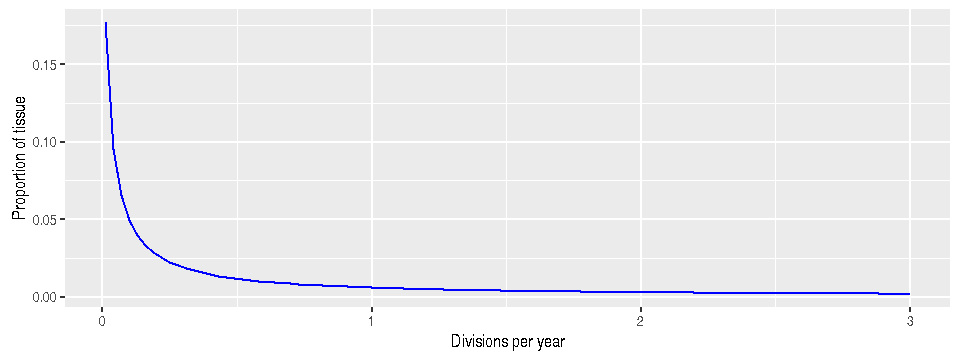

In [150]:
tissue.size <- function(x) {
    return((10^(-18.49/log10(0.5*0.0203))/3.8e9)/(2+80*x))
}
ggplot(data.frame(x = c(0.01,3)), aes(x)) + stat_function(fun = tissue.size, geom = "line", color="blue") + 
  xlab("Divisions per year") + ylab("Proportion of tissue")

Example: $r_{\mathrm{BRAF}} = 0.5 r$, $d_{\mathrm{BRAF}} = 1$ (one cell division per year), $s_{\mathrm{BRAF}} = 0.01s$ (only one in 100 melanocytes are susceptible to BRAF mutations). Then

\begin{equation*}
  \mathrm{aERS} = 18.49 + \log_{10}(0.5 r) \log_{10}(0.01s(82)-2) = -0.44,
\end{equation*}

which would still place these on the "back luck" side of the classification. 

We can also figure out the potential position of BRAF and NRAS on the Tomasetti-Vogelstein graph as a function of total tissue size.

![title](tv.png)

The gree line give the range of positions for BRAF as the tissue size varies from $0.001s$ to $s$, where $s$ is the total tissue size of melanocytes estimated by Tomasetti and Vogelstein. The red line does the same with NRAS.

### <font color="grey">  1.4. Methods</font>

**Model 1**

The analysis is based on two simplified models. For the first model we make the following assumptions:

1. Cells divide at a fixed expected rate $r$ divisions per year;
2. Mutations occur at a rate of $u$ mutations per gigabase pair per cell division.

Let $N=N(t)$ be the total number of mutations accumulated at time $t$. This is what we are observing. Under the above assumptions, the *ratio* $N/t$ follows a Poisson distribution with fixed parameter $\lambda$,

\begin{equation*}
  \mtx{P}\{N/t = n\} = \frac{\lambda^n e^{-\lambda}}{n!}.
\end{equation*}

The estimate of $\lambda$ is gained from a Poisson regression. 

![title](poisson.png)

The interpretation is that the expected number of mutations at time (age) $t$ is $\lambda t$. The plot below shows the expected number of mutations at each age $t$, calculated from the data in the age range between $30$ and $70$. Note that this is **not** a linear regression, which would show a flat line for BRAF but would not be theoretically justified. 

![title](simple.png)

** Model 2**

For the accumulation of mutations at time $t$, [Podolskiy et al](http://www.nature.com/articles/ncomms12157) postulate the following model, assumed to be valid for a certain age range (say, $[30,70]$). At each age $t$, the number of muations $N(t)$ is approximately distributed according to a Poisson distribution with rate $\lambda(t)$,

\begin{equation*}
  \mtx{P}\{N(t) = n\} = \frac{\lambda(t)^n e^{-\lambda(t)}}{n!},
\end{equation*}

where the expected value $\lambda(t)$ depends on age as

\begin{equation*}
  \lambda(t) = N_0 e^{\alpha t}.
\end{equation*}

The value of $N_0$ and of $\alpha$ may depend on other factors, such as gender, the presence of BRAF or NRAS mutations or the presence of R alleles in the MC1R gene. The estimate of $N_0$ and $\alpha$ follows from a Poisson regression with age as covariate. Alternatively, as in [Podolskiy et al](http://www.nature.com/articles/ncomms12157), one can subdivide the data into age intervals and estimate the parameter for each of these intervals. 

### <font color="grey">  1.5. Issues</font>

Some things to consider:
1. The mutation load seems to vary with age. In particular, the increase is slightly exponential in mid-age, and slows down at higher ages. Is this due to changes in mutation frequency or in cell division rate?
2. Certain mutations can increase the mutation frequency, while others may lead to an increase in proliferation. 
3. Perform goodness-of-fit tests, test for over- or under dispersion and use negative binomial models instead, etc. Include confidence intervals and P values in everything.
4. Get larger datasets / datasets for validation.
5. Get more precise information on some of the parameters involved.
6. Include more parameters / covariates in the analysis.

These would require reading one or two piles of papers before proceeding.
* Look at more refined models for the accumulation of mutations. Examples include [Bozic et al](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004731), [Bozic et al](http://www.pnas.org/content/107/43/18545.abstract), [Keller and Antal](http://iopscience.iop.org/article/10.1088/1742-5468/2015/01/P01011/meta), [Paterson, Nowak and Waclaw](http://www.nature.com/articles/srep39511as), as well as related work from the group of [Martin Nowak](http://ped.fas.harvard.edu/).
* Look at material on the proliferation of cells in order to deduce some conclusions from the estimated cell division rates. Possible sources to look at include in [Cichorek et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3834696/), [Whiteman et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3395885/), [Zabierowski et al](https://www.ncbi.nlm.nih.gov/pubmed/21410654), [Hoek and Goding](https://www.ncbi.nlm.nih.gov/pubmed/20726948), and [Schatton and Frank](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885609/). 
* Double wild types

---
## <font color="grey">  2. Details</font>
---

### <font color="grey">  2.1. Data used </font>

We use data from the [TCGA SKCM](https://gdc-portal.nci.nih.gov/projects/TCGA-SKCM) database. The specific prepared files are from the supplementary material to [Robles-Espinoza et al](http://www.nature.com/articles/ncomms12064) and from a file provided by Amaya and Simon. The data is loaded an prepared using an external script, which prepares a data frame including most of the information from the [Robles-Espinoza et al](http://www.nature.com/articles/ncomms12064), enhanced with the SNV calls and BRAF/NRAF classification provided by Amaya and Simon. Eventually one might want to try out more datasets.

The variables **age_at_diagnosis**, **breslow**, **sig1**, **sig5**, **sig7**, **totalNonUV**, **totalSNV** are quantitative, the variables **gender** (2), **clark_level** (5), **ulceration** (2), **tissue_source_site** (12), **body_area** (4), **rgeno** (6), **Cohort** (2) are categorial, and **V60L**, **D84E**, **V92M**, **R142H**, **R151C**, **I155T**, **R160W**, **R163Q**, **D294H**, **other.rscore** are ordinal with three levels (0,1,2).

In [152]:
source("prepare.R")
head(data, 5)

,age_at_diagnosis,breslow,gender,clark_level,ulceration,tissue_source_site,body_area,tissue_type,Cohort,V60L,⋯,R160W,R163Q,D294H,other.rscore,rgeno,sig1,sig5,sig7,totalNonUV,totalSNV
1,74,9,FEMALE,IV,YES,BF,Trunk,Primary Tumor,NRAS,0,⋯,0,2,0,0,"r,r",18,0,322,38,339
3,79,0.4,FEMALE,II,NO,D3,Extremities,Regional Lymph Node,NRAS,0,⋯,0,0,0,0,"0,0",22,21,2,31,54
5,53,1.45,FEMALE,IV,YES,D3,Extremities,Regional Lymph Node,BRAF,0,⋯,0,0,1,0,"R,0",17,13,295,41,325
6,60,NA,MALE,NA,NA,D3,Trunk,Regional Lymph Node,BRAF,1,⋯,0,0,0,0,"R,r",28,22,393,62,452
7,55,50,MALE,V,NA,D3,Extremities,regional (sub)cutaneous tissue,BRAF,0,⋯,1,0,0,0,"R,0",73,110,822,100,992


### <font color="grey">  2.2. Melanocyte proliferation and other background information</font>

Based on [Tomasetti and Vogelstein](http://science.sciencemag.org/content/347/6217/78), melanocytes divide every $\sim 147$ days, or $2.48$ times per year. Moreover, Tomasetti and Vogelstein assume that melanocytes are stem cells. I found other interesting information in [Cichorek et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3834696/), [Whiteman et al](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3395885/), [Zabierowski et al](https://www.ncbi.nlm.nih.gov/pubmed/21410654), [Hoek and Goding](https://www.ncbi.nlm.nih.gov/pubmed/20726948), and [Schatton and Frank](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885609/). 

In [153]:
library(MASS)
library(robustbase)
library(ggplot2)
library(repr)
library(AER)
library(vcd)
options(repr.plot.width=8, repr.plot.height=3)

In [154]:
# Load data using external script
source('prepare.R')
dim(data)

[1] 196  25

In [155]:
# Deal with a sensible age range
#data <- subset(data, age_at_diagnosis < 70)
# Manually remove some outliers
#data <- subset(data, totalNonUV/age_at_diagnosis < 6)
#data <- subset(data, sig1 > 0)
#dim(data)

### <font color="grey">  2.3 Robust linear regression </font>

We first plot the robust regression lines for the Signature 1 exposure against time. While this does not represent a realistic model, this is merely for comparison with [Alexandrov et al](http://www.nature.com/ng/journal/v47/n12/full/ng.3441.html), where such regression lines were drawn for different cancer types. We also show that the slopes change if one caps the age. Some statistical exploration show that looking at the logarithm of the exposure would make a better fit, but we don't pursue this further as this does not model the accumulation of mutations in any case.

Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 14 rows containing missing values (geom_point).”Warning message in grid.Call.graphics(L_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

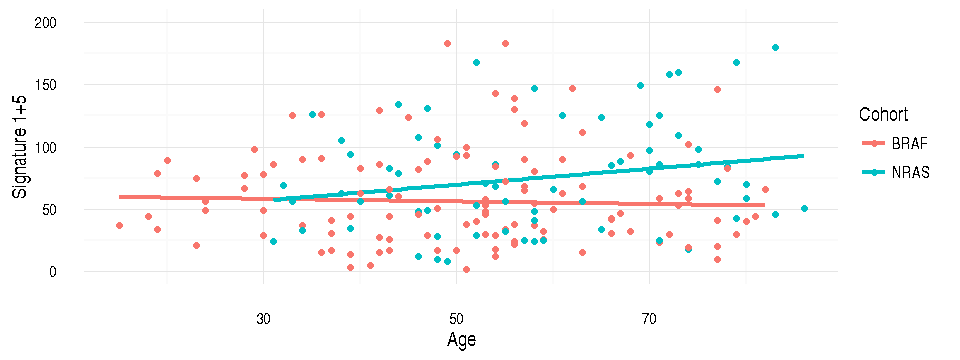

In [156]:
ggplot(data, aes(age_at_diagnosis, sig1+sig5, color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("Signature 1+5") + scale_y_continuous(limits = c(0,200)) +
    theme_minimal()

We now look at the picture when we consider only those of age <70.

Warning message:
“Removed 8 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 8 rows containing missing values (geom_point).”Warning message in grid.Call.graphics(L_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

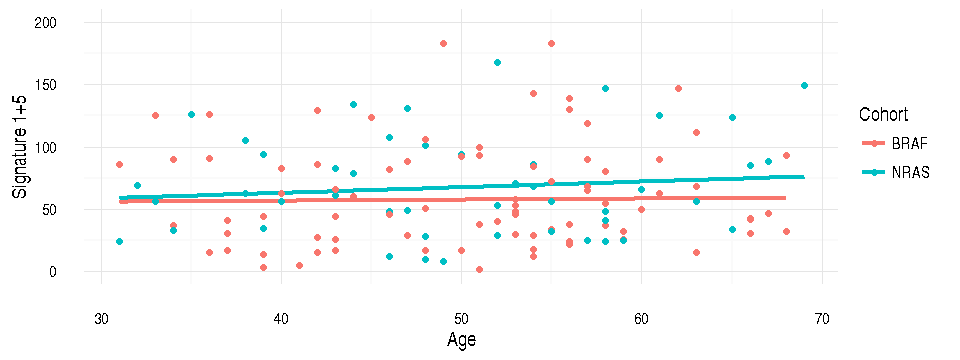

In [157]:
ggplot(subset(data, age_at_diagnosis<70 & age_at_diagnosis>30), aes(age_at_diagnosis, sig1+sig5, color=Cohort)) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("Age") + ylab("Signature 1+5") + scale_y_continuous(limits = c(0,200)) +
    theme_minimal()

### <font color="grey">  2.4 Simple Poisson model </font>

Here, by *mutation* we mean one unit of Signature 1 and 5 exposure. Alternative we can also count subsitutions which are not TCC>TTC (which is the dominant form in Signature 7). We make the following assumptions:

1. Cells divide at a fixed expected rate $r$ divisions per year;
2. Mutations occur at a rate of $u$ mutations per gigabase pair per cell division.

Let $N=N(t)$ be the total number of mutations accumulated at time $t$.

Under these assumptions, the *ratio* $N/t$, follows a Poisson distribution with fixed parameter $\lambda$, though it is assumed that $\lambda$ depends on the cohort (NRAS / BRAF) and possibly other parameters. 

\begin{equation*}
  \mtx{P}\{N/t = n\} = \frac{\lambda^n e^{-\lambda}}{n!},
\end{equation*}

The estimate of $\lambda$ is gained from a Poisson regression with age as offset,

\begin{equation*}
  \log \mtx{E}[N] = \log(t) + \beta_0,
\end{equation*}

where the computed intensity of the process is then $\lambda = e^{\beta_0}$. The interpretation is that the expected number of mutations at time (age) $t$ is $\lambda t = e^{\beta_0}t$. To check whether this all makes sense, we attempt a plot.

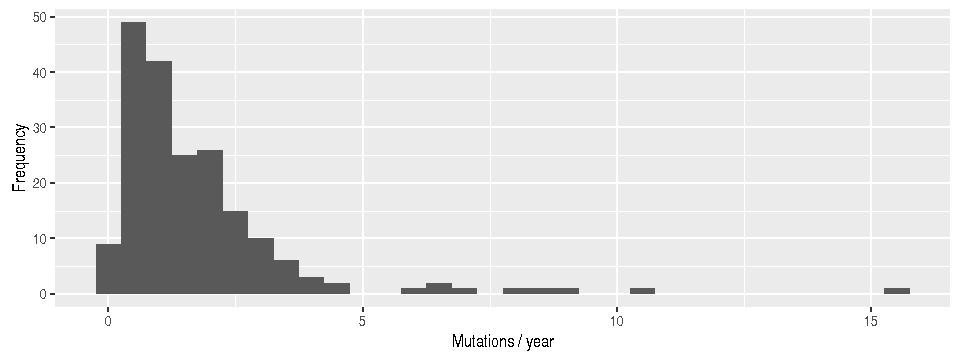

In [158]:
# Check the assumption of a Poisson distribution visually first
ggplot(data, aes((sig1+sig5)/age_at_diagnosis)) +
    geom_histogram(binwidth = 0.5, position="dodge") + guides(fill=FALSE) +
    xlab("Mutations / year") + ylab("Frequency")

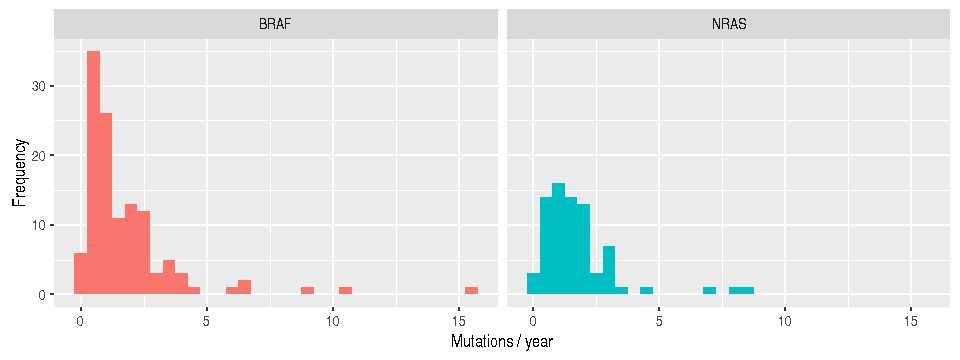

In [159]:
# Check the assumption of a Poisson distribution by dividing the different cohorts
ggplot(data, aes((sig1+sig5)/age_at_diagnosis, fill=Cohort)) +
    geom_histogram(binwidth = 0.5, position="dodge") + guides(fill=FALSE) +
    facet_wrap(~ Cohort, ncol=2) + xlab("Mutations / year") + ylab("Frequency")

In [160]:
# Fit the model
res.simple <- glm(sig1+sig5 ~ offset(log(age_at_diagnosis)), data = data, family="poisson")
summary(res.simple)


Call:
glm(formula = sig1 + sig5 ~ offset(log(age_at_diagnosis)), family = "poisson", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-13.056   -6.330   -2.317    2.948   35.662  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.444421   0.007825    56.8   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 12043  on 195  degrees of freedom
Residual deviance: 12043  on 195  degrees of freedom
AIC: 13206

Number of Fisher Scoring iterations: 5



	 Goodness-of-fit test for poisson distribution

                     X^2 df   P(> X^2)
Likelihood Ratio 17.3898 10 0.06617162


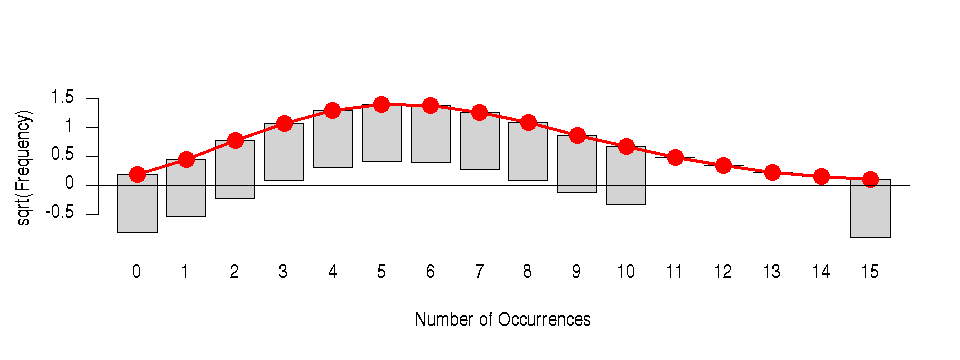

In [161]:
fit <- goodfit((data$sig1+data$sig5)/data$age_at_diagnosis)
summary(fit) 
rootogram(fit)

In [162]:
deviance(res.simple)/res.simple$df.residual
dispersiontest(res.simple)

[1] 61.76076


	Overdispersion test

data:  res.simple
z = 3.7458, p-value = 8.992e-05
alternative hypothesis: true dispersion is greater than 1
sample estimates:
dispersion 
    91.203 


In [163]:
ssr <- sum(residuals(res.simple, type="pearson")^2)
n <- dim(data)[1]
pchisq(ssr, df=n-1)

[1] 1

**Estimating the cell division rate**

We first estimate the expected mutation load using this model for the whole data, without differentiating between NRAS and BRAF. Using the estimate of cell division rate for melanocytes from Tomasetti and Vogelstein, given as $2.48$ cell division per year, we compute the mutation rate per gigabase pair per cell division. This rate is then used later to estimate the difference in cell division rates between NRAS and BRAF samples.

In [164]:
source('prepare.R')
# Get rid of some outliers
data <- subset(data, (sig1+sig5)/age_at_diagnosis < 10)
# Create various restricted data sets
data.age <-  subset(data, age_at_diagnosis < 70 & age_at_diagnosis > 30)
data.R <- subset(data, grepl("R",rgeno))
data.r <- subset(data, !grepl("R",rgeno))
data.age.R <- subset(data, age_at_diagnosis < 70 & age_at_diagnosis > 30 & grepl("R",rgeno))
data.age.r <- subset(data, age_at_diagnosis < 70 & age_at_diagnosis > 30 & !grepl("R",rgeno))
data.male <- subset(data, gender == "MALE")
data.female <- subset(data, gender == "FEMALE")
data.age.male <- subset(data, gender == "MALE" & age_at_diagnosis < 70 & age_at_diagnosis > 30)
data.age.female <- subset(data, gender == "FEMALE" & age_at_diagnosis < 70 & age_at_diagnosis > 30)
# Check the dimensions
sizes <- c(dim(data.age)[1], dim(data.R)[1], dim(data.r)[1], 
    dim(data.age.R)[1], dim(data.age.r)[1], dim(data.male)[1], dim(data.female)[1],
    dim(data.age.male)[1], dim(data.age.female)[1])
sizes

[1] 136  96  98  72  64 123  71  92  44

In [165]:
# Define a function to deal with all the different types of data sets
analyse <- function(df) {
    # Use parameter from Tomasetti-Vogelstein
    div_per_year <- 2.48
    res.simple <- glm(sig1+sig5 ~ offset(log(age_at_diagnosis)), data = df, family="poisson")
    lambda <- exp(coef(res.simple)["(Intercept)"])
    # Estimate mutation rate 
    u <- unname(lambda/div_per_year)
    res_braf.simple <- glm(sig1+sig5 ~ offset(log(age_at_diagnosis)), data = subset(df, Cohort=="BRAF"), family="poisson")
    res_nras.simple <- glm(sig1+sig5 ~ offset(log(age_at_diagnosis)), data = subset(df, Cohort=="NRAS"), family="poisson")
    lambda_nras <- exp(coef(res_nras.simple)["(Intercept)"])
    lambda_braf <- exp(coef(res_braf.simple)["(Intercept)"])
    ratio <- unname(lambda_nras/lambda_braf)
    div_nras <- unname(lambda_nras/u)
    div_braf <- unname(lambda_braf/u)
    # TODO: return some statistical test results
    return(c(ratio, u, div_nras, div_braf))
}

In [166]:
res <- analyse(data)
res.age <- analyse(data.age)
res.R <- analyse(data.R)
res.r <- analyse(data.r)
res.age.R <- analyse(data.age.R)
res.age.r <- analyse(data.age.r)
res.male <- analyse(data.male)
res.female <- analyse(data.female)
res.age.male <- analyse(data.age.male)
res.age.female <- analyse(data.age.female)

all.data <- as.data.frame(t(matrix(c(res, res.R, res.r, res.male, res.female), ncol=5, nrow=4)))
colnames(all.data) <- c('Ratio', 'Mutation rate', 'Division rate NRAS', 'Division rate BRAF')
rownames(all.data) <- c("All", "1-2 R", "0 R", "Male", "Female")

age.data <- as.data.frame(t(matrix(c(res.age, res.age.R, res.age.r, res.age.male, res.age.female), ncol=5, nrow=4)))
colnames(age.data) <- c('Ratio', 'Mutation rate', 'Division rate NRAS', 'Division rate BRAF')
rownames(age.data) <- c("All", "1-2 R", "0 R", "Male", "Female")

round(all.data, 2)
round(age.data, 2)

#write.csv(all.data, file="divrates_all.csv")
#write.csv(age.data, file="divrates_age.csv")

,Ratio,Mutation rate,Division rate NRAS,Division rate BRAF
All,1.22,0.60,2.77,2.27
1-2 R,1.28,0.74,2.88,2.26
0 R,1.32,0.48,2.84,2.16
Male,1.32,0.67,2.88,2.19
Female,1.04,0.50,2.53,2.44


,Ratio,Mutation rate,Division rate NRAS,Division rate BRAF
All,1.18,0.64,2.74,2.33
1-2 R,1.23,0.81,2.84,2.30
0 R,1.19,0.46,2.75,2.30
Male,1.24,0.67,2.82,2.28
Female,1.01,0.58,2.50,2.47


The mutation rate per cell division per site has been varyingly estimated to be between $10^{-10}$ and $10^{-9}$, which per gigabase ($10^9$) pair gives the right order of magnitude. We now plot the Poisson means in the age restricted data.

Warning message:
“Removed 8 rows containing missing values (geom_point).”

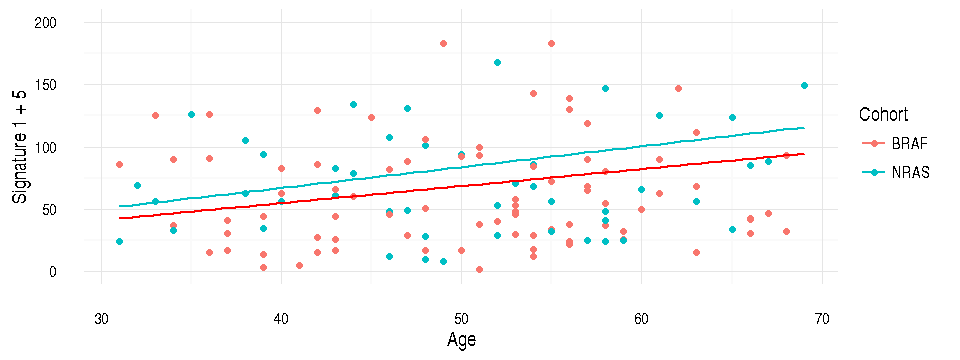

In [167]:
ggplot(data.age, aes(age_at_diagnosis, sig1+sig5, color=Cohort)) + geom_point() +
    stat_function(fun=function(x)lambda_nras*x, geom="line") +
    xlab("Age") + ylab("Signature 1 + 5") + scale_y_continuous(limits = c(0,200)) +
    stat_function(fun=function(x)lambda_braf*x, geom="line", color="red") +
    theme_minimal()

### <font color="grey">  2.5 Poisson model with exponential dependence on age</font>

For the accumulation of mutations at time $t$, [Podolskiy et al](http://www.nature.com/articles/ncomms12157) postulate the following model, assumed to be valid for a certain age range (say, $[30,70]$). At each age $t$, the number of muations $N(t)$ is approximately distributed according to a Poisson distribution with rate $\lambda(t)$,

\begin{equation*}
  \mtx{P}\{N(t) = n\} = \frac{\lambda(t)^n e^{-\lambda(t)}}{n!},
\end{equation*}

where the expected value $\lambda(t)$ depends on age as

\begin{equation*}
  \lambda(t) = N_0 e^{\alpha t}.
\end{equation*}

Actually, the model with Poisson distribution is not completely accurate, as it measures the accumulation of mutations before clonal expansion, after which the number of mutations follows a different pattern. One might consider a more sophisticated model in a future exploration.

The value of $N_0$ and of $\alpha$ may depend on other factors, such as gender, the presence of BRAF or NRAS mutations or the presence of R alleles in the MC1R gene. We check the validity of this model in certain age ranges later on. 

Suppose that at age $t$ we have $N_1(t),\dots,N_s(t)$ samples. We estimate the parameter $\lambda(t) = \lambda(t,X_1,\dots,X_p) = \mtx{E}[N(t) \ | \ X_1,\dots,X_p]$ using Poisson regression,

\begin{equation*}
  \log \mtx{E}[N(t) \ | \ X_1,\dots,X_p ] = \beta_0 + \sum_{i=1}^p \beta_i X_i,
\end{equation*}

where the $\beta_i$ are allowed to depend on $t$. In [Podolskiy et al](http://www.nature.com/articles/ncomms12157), the authors look at small time intervals and determine the Poisson peaks for each of these intervals. 
The practical problem with the approach described above is that we do not have enough data for reliably estimating Poisson average at each time. We can still try to use, for eath $t$ in a suitable range and $\Delta t$ (for example, 5 years), to use the interval $(t-\Delta t, t+\Delta t]$. A different approach would be to estimate the parameters for all times simultaneously.

However, having estimated the parameters of the model above, we can compute $N_0$ and $\alpha$ by a linear regression,

\begin{equation*}
  \log(N_0) + \alpha t = \hat{\beta}_0 + \sum_{i=1}^p \hat{\beta}_i X_i. \quad \quad [1]
\end{equation*}

There probably needs to be some statistical hacking to make this rigorous. Under the simplification assumption that $\alpha$ does not depend on the other covariates, we can just include age (time) $t$ among the dependent variables and solve a standard Poisson model,

\begin{equation*}
  \log \mtx{E}[N \ | \ t, X_1,\dots,X_p ] = \beta_0 + \alpha t + \sum_{i=1}^p \beta_i X_i,
\end{equation*}

As a first approximation, we can disregard the other covariates, and include age as covariate (rather than as time parameter). This corresponds to a "time independent" poisson "process", where time is used as covariate. The model is thus

\begin{equation*}
  \log \mtx{E}[N \ | \ X_1] = \beta_0+\beta_1X_1,
\end{equation*}

where $X_1$ corresponds to age.

In [168]:
res.poisson <- glm(totalNonUV ~ 1 + age_at_diagnosis, data = data, family="poisson")
summary(res.poisson)


Call:
glm(formula = totalNonUV ~ 1 + age_at_diagnosis, family = "poisson", 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-10.649   -5.277   -2.299    1.489   26.732  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      3.8698063  0.0302899  127.76   <2e-16 ***
age_at_diagnosis 0.0080540  0.0005224   15.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 8897.6  on 193  degrees of freedom
Residual deviance: 8658.4  on 192  degrees of freedom
AIC: 9795.2

Number of Fisher Scoring iterations: 5


Do a Pearson residual goodness of fit test. A value of $1$ means that we're doing well.

In [169]:
n <- dim(data)[1]
ssr <- sum(residuals(res.poisson, type="pearson")^2)
pchisq(ssr, df=n-1)

[1] 1

Next, it might be worth looking at other covariates. We stick to the ones for which we have enough data.

In [116]:
# Define a function to deal with all the different types of data sets
analyse.new <- function(df) {
    res_braf <- glm(sig1+sig5 ~ age_at_diagnosis, data = subset(df, Cohort=="BRAF"), family=poisson(link=log))
    res_nras <- glm(sig1+sig5 ~ age_at_diagnosis, data = subset(df, Cohort=="NRAS"), family=poisson(link=log))
    N_nras <- unname(exp(coef(res_nras)["(Intercept)"]))
    N_braf <- unname(exp(coef(res_braf)["(Intercept)"]))
    alpha_nras <- unname(coef(res_nras)["age_at_diagnosis"])
    alpha_braf <- unname(coef(res_braf)["age_at_diagnosis"])
    # TODO: return some statistical test results
    return(c(N_nras, N_braf, alpha_nras, alpha_braf))
}

In [117]:
res <- analyse.new(data)
res.age <- analyse.new(data.age)
res.R <- analyse.new(data.R)
res.r <- analyse.new(data.r)
res.age.R <- analyse.new(data.age.R)
res.age.r <- analyse.new(data.age.r)
res.male <- analyse.new(data.male)
res.female <- analyse.new(data.female)
res.age.male <- analyse.new(data.age.male)
res.age.female <- analyse.new(data.age.female)

all.data <- as.data.frame(t(matrix(c(res, res.R, res.r, res.male, res.female), ncol=5, nrow=4)))
colnames(all.data) <- c('N NRAS', 'N BRAF', 'alpha NRAS', 'alpha BRAF')
rownames(all.data) <- c("All", "1-2 R", "0 R", "Male", "Female")

age.data <- as.data.frame(t(matrix(c(res.age, res.age.R, res.age.r, res.age.male, res.age.female), ncol=5, nrow=4)))
colnames(age.data) <- c('N NRAS', 'N BRAF', 'alpha NRAS', 'alpha BRAF')
rownames(age.data) <- c("All", "1-2 R", "0 R", "Male", "Female")

round(all.data, 8)
round(age.data, 8)

,N NRAS,N BRAF,alpha NRAS,alpha BRAF
All,55.59018668,79.27952118,0.00949990,-0.00260491
1-2 R,90.35897539,91.31488160,0.00479594,-0.00284494
0 R,24.00897518,44.87629428,0.01985282,0.00436785
Male,44.77507217,73.85805864,0.01531415,0.00010863
Female,67.02223042,87.09894734,0.00210961,-0.00702714


,N NRAS,N BRAF,alpha NRAS,alpha BRAF
All,67.03663787,93.13698239,0.00524428,-0.00436667
1-2 R,94.75652773,138.57836407,0.00344495,-0.00892237
0 R,32.01189094,14.91362676,0.01361468,0.02479236
Male,67.19466432,98.96510557,0.00677578,-0.00467147
Female,79.70039086,95.48632220,-0.00280454,-0.00685398


Warning message:
“Removed 8 rows containing missing values (geom_point).”

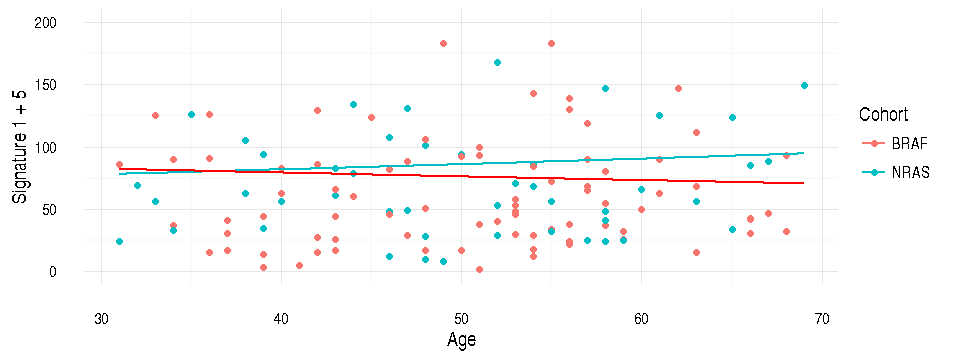

In [118]:
N.nras <- 67
N.braf <- 93
alpha.nras <- 0.005
alpha.braf <- -0.004
ggplot(data.age, aes(age_at_diagnosis, sig1+sig5, color=Cohort)) + geom_point() +
    stat_function(fun=function(x)(N.nras*exp(alpha.nras*x)), geom="line") +
    xlab("Age") + ylab("Signature 1 + 5") + scale_y_continuous(limits = c(0,200)) +
    stat_function(fun=function(x)(N.braf*exp(alpha.braf*x)), geom="line", color="red") +
    theme_minimal()

### <font color="grey">  2.6. The Tomasetti-Vogelstein graph</font>

We load the data from the Tomasetti-Vogelstein paper and include the estimated lscd parameters from above.

Warning message in grid.Call.graphics(L_polygon, x$x, x$y, index):
“semi-transparency is not supported on this device: reported only once per page”

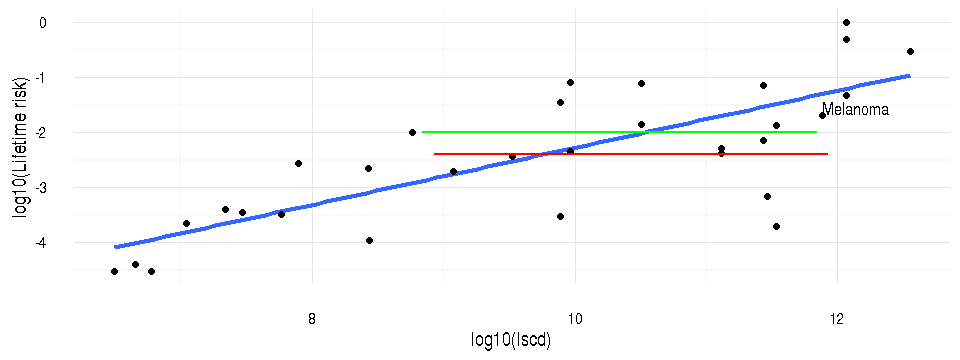

In [145]:
df <- read.csv('data/s1-vogelstein.csv', header=TRUE)
tv <- data.frame(df$X,df$Lifetime.cancer.risk)
tv$lscd <- df[,ncol(df)]

s <- 3.8e9
r <- 0.0203
r.nras <- 0.2*r
r.braf <- 0.5*r
d.nras <- 2.77
d.braf <- 2.27

lscd.fun.nras <- function(delta) {
    return(delta*s*(80*d.nras+2)-2)
}

lscd.fun.braf <- function(delta) {
    return(delta*s*(80*d.braf+2)-2)
}

ggplot(tv, aes(log10(lscd), log10(df.Lifetime.cancer.risk))) +  geom_smooth(method = "lmrob") + geom_point() +
    xlab("log10(lscd)") + ylab("log10(Lifetime risk)") + 
    geom_text(aes(label=ifelse(row.names(tv)==19,as.character(df.X),'')),hjust=0, vjust=0) + 
    geom_segment(aes(x = log10(lscd.fun.nras(0.001)), y=log10(r.nras), xend = log10(lscd.fun.nras(1)), yend = log10(r.nras)), color = "red") +
geom_segment(aes(x = log10(lscd.fun.braf(0.001)), y=log10(r.braf), xend = log10(lscd.fun.braf(1)), yend = log10(r.braf)), color = "green") +  
theme_minimal()

The green line gives the range of positions for BRAF melanoma, when the tissue size ranges from $0.001s$ to $s$, where $s$ is the total number of stem cells estimated by Tomasetti and Vogelstein. The redi line is the same for NRAS.